In [71]:
## Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.colors import Normalize
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import pandas as pd
from scipy import interpolate

In [2]:
# fig = plt.figure(figsize=(12,6)) # set plot size
# lon_0 = 0
# lat_0 = 0
# m = Basemap(projection='hammer',lon_0=lon_0)
# Lat2,Lon2 = np.meshgrid(np.array(nc.variables['latitude']),np.array(nc.variables['longitude']))
# Lon2,Lat2 = m(Lon2,Lat2)
# zMOL = nc.variables['zMOL']
# albedo = nc.variables['albedo']
# m.contourf(Lon2,Lat2,np.transpose(np.array(zMOL)), cmap='gist_gray', levels=25)

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).WARNING: x coordinate not montonically increasing - contour plot
may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).WARNING: x coordinate not montonically increasing - contour plot
may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/sh

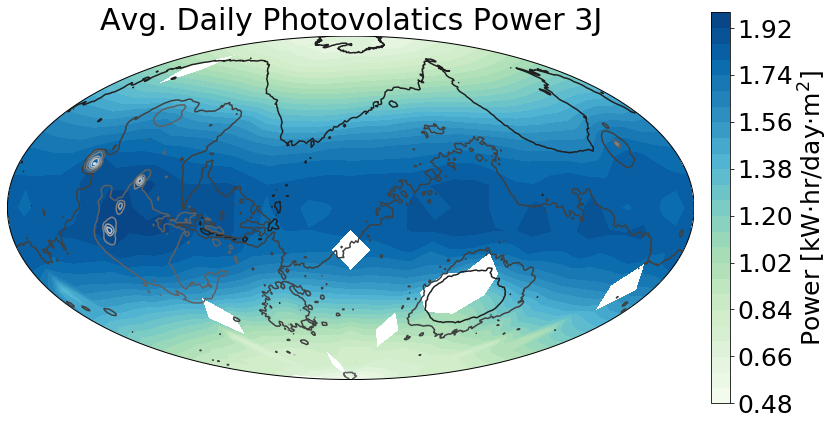

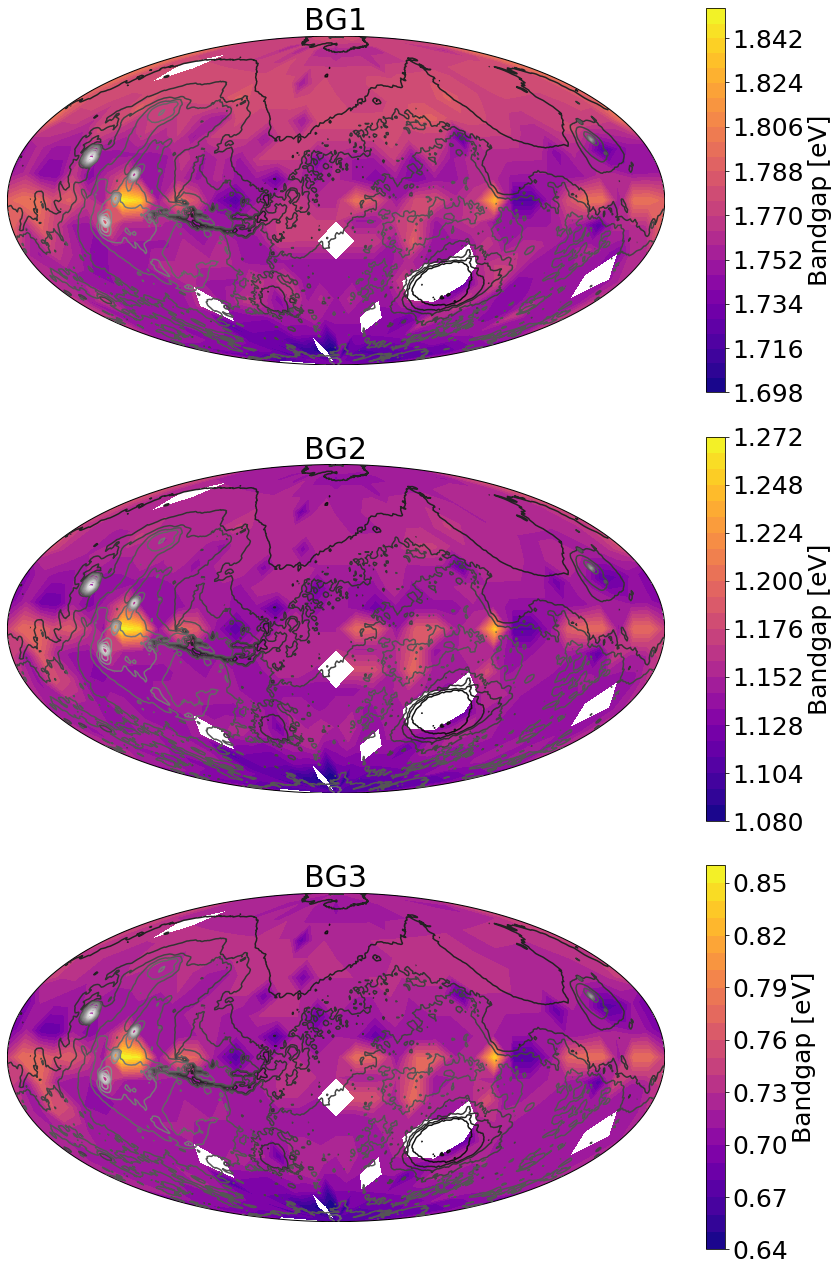

In [3]:
## 3J-PV
ds = xr.open_dataset('j3pv_final.nc')
nc = xr.open_dataset('extras/surface.nc')


## 3J-PV Plot
fig = plt.figure(figsize=(12,6)) # set plot size
lon_0 = 0
lat_0 = 0
m = Basemap(projection='hammer',lon_0=lon_0)
Lat2,Lon2 = np.meshgrid(np.array(nc.variables['latitude']),np.array(nc.variables['longitude']))
Lon2,Lat2 = m(Lon2,Lat2)
zMOL = nc.variables['zMOL']
albedo = nc.variables['albedo']
m.contour(Lon2,Lat2,np.transpose(np.array(zMOL)), cmap='gist_gray')

lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
lons,lats = m(lons,lats)
j3pv = ds['j3pv']
cs = m.contourf(lons,lats,j3pv.transpose(), cmap='GnBu', levels=25)
plt.title(r'Avg. Daily Photovolatics Power 3J', fontsize = 30)

maxpv = np.max(ds['j3pv'])
maxargs = np.unravel_index(np.argmax(ds['j3pv']),np.shape(ds['j3pv']), order='C')
y = maxargs[0]
x = maxargs[1]
X,Y = m(ds['lon'][y],ds['lat'][x])

m.plot(x,y, marker='o',markersize=10,color='r')

cbar = plt.colorbar(cs, pad=0.02)
cbar.set_label(r'Power [kW$\cdot$hr/day$\cdot$m$^2$]', fontsize=25)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('j3pv.png',dpi=300,bbox_inches='tight')

## 3J-PV BGs Plot
keys = ['j3pv-bg1', 'j3pv-bg2', 'j3pv-bg3']
tit = ['BG1', 'BG2', 'BG3']

minbg = np.min(np.array([np.min(ds[x]) for x in keys]))
maxbg = np.max(np.array([np.max(ds[x]) for x in keys]))
norm = normalizer=Normalize(minbg,maxbg)

# fig = plt.figure(figsize=(12,6)) # set plot size
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,18))
minbg = []
for i in range(0,len(keys)):
    ax[i].set_title(str(tit[i]), fontsize = 30)
    m = Basemap(projection='hammer',lon_0=0,ax=ax[i])
    m.contour(Lon2,Lat2,np.transpose(np.array(zMOL)), cmap='gist_gray',levels=15)
    lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
    lons,lats = m(lons,lats)
    bg = ds[keys[i]]
    cs = m.contourf(lons,lats,bg.transpose(),cmap='plasma',levels=25)
#     cbar = plt.colorbar(cs, pad=0.02, ax=ax.ravel().tolist())
    cbar = plt.colorbar(cs, ax=ax[i])
    cbar.set_label(r'Bandgap [eV]', fontsize=25)
    cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('j3pvbg.png',dpi=300,bbox_inches='tight')

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

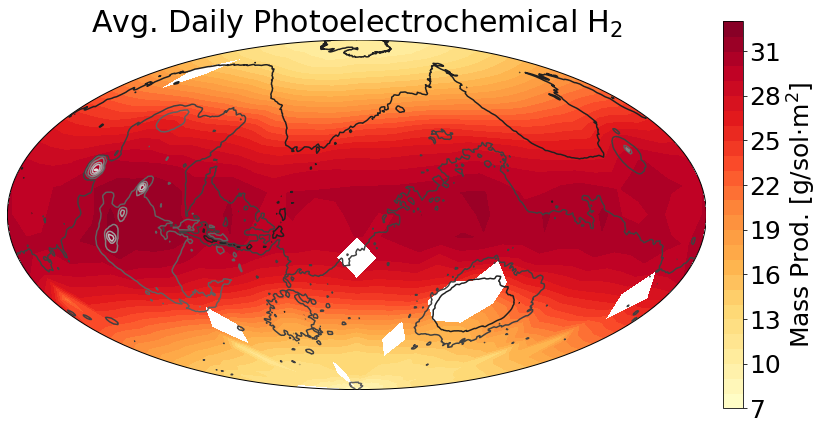

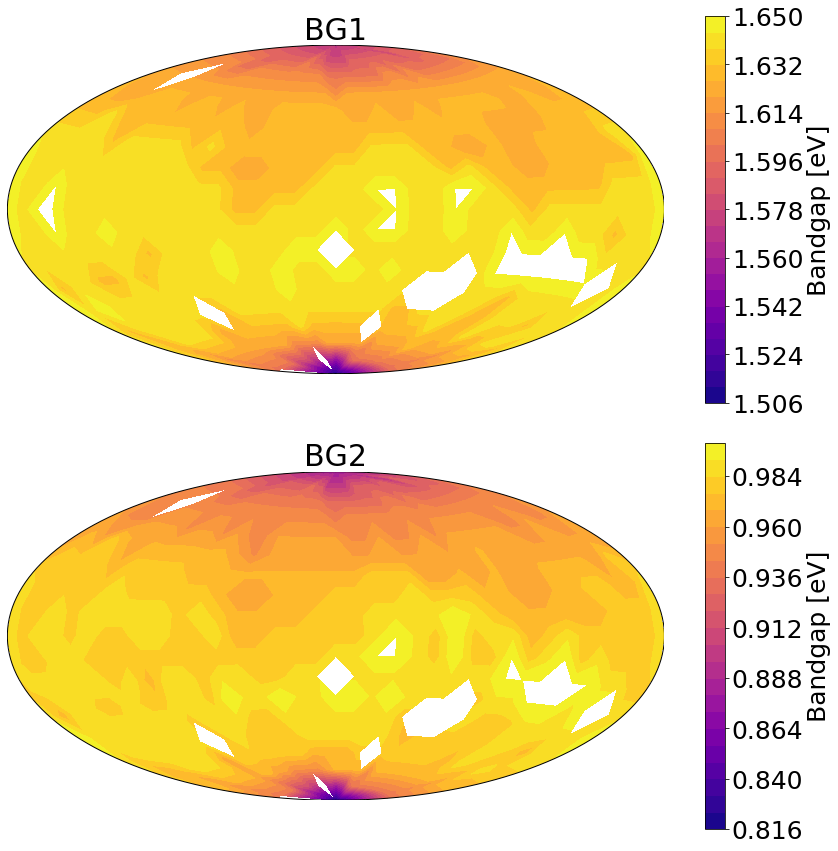

In [4]:
## 2J-H2
ds = xr.open_dataset('j2h2_final.nc')
nc = xr.open_dataset('extras/surface.nc')


## 2J-H2 Plot
fig = plt.figure(figsize=(12,6)) # set plot size
lon_0 = 0
lat_0 = 0
m = Basemap(projection='hammer',lon_0=lon_0)
Lat2,Lon2 = np.meshgrid(np.array(nc.variables['latitude']),np.array(nc.variables['longitude']))
Lon2,Lat2 = m(Lon2,Lat2)
zMOL = nc.variables['zMOL']
albedo = nc.variables['albedo']
m.contour(Lon2,Lat2,np.transpose(np.array(zMOL)), cmap='gist_gray')

lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
lons,lats = m(lons,lats)
prod = ds['j2h2']
cs = m.contourf(lons,lats,prod.transpose(), cmap='YlOrRd', levels=25)
plt.title('Avg. Daily Photoelectrochemical H$_{2}$', fontsize = 30)

cbar = plt.colorbar(cs, pad=0.02)
cbar.set_label(r'Mass Prod. [g/sol$\cdot$m$^2$]', fontsize=25)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('j2h2.png',dpi=300,bbox_inches='tight')

## 3J-PV BGs Plot
keys = ['j2h2-bg1', 'j2h2-bg2']
tit = ['BG1', 'BG2']

minbg = np.min(np.array([np.min(ds[x]) for x in keys]))
maxbg = np.max(np.array([np.max(ds[x]) for x in keys]))
norm = normalizer=Normalize(minbg,maxbg)

# fig = plt.figure(figsize=(12,6)) # set plot size
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
minbg = []
for i in range(0,len(keys)):
    ax[i].set_title(str(tit[i]), fontsize = 30)
    m = Basemap(projection='hammer',lon_0=0,ax=ax[i])
    lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
    lons,lats = m(lons,lats)
    bg = ds[keys[i]]
    cs = m.contourf(lons,lats,bg.transpose(),cmap='plasma',levels=25)
#     cbar = plt.colorbar(cs, pad=0.02, ax=ax.ravel().tolist())
    cbar = plt.colorbar(cs, ax=ax[i])
    cbar.set_label(r'Bandgap [eV]', fontsize=25)
    cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('j2h2bg.png',dpi=300,bbox_inches='tight')

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

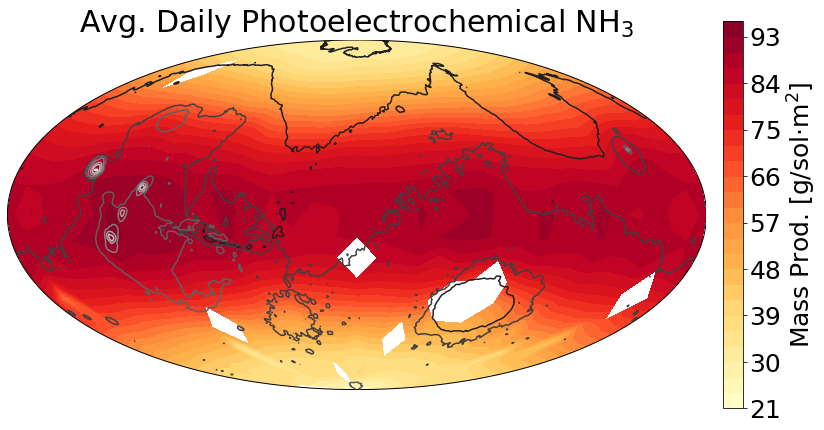

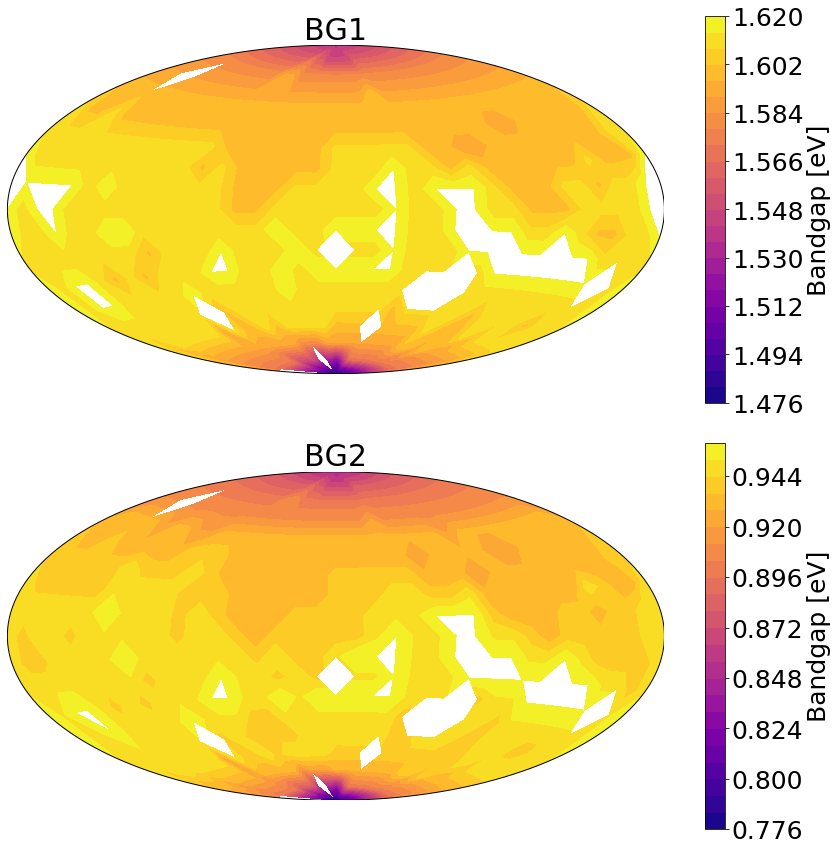

In [5]:
## 2J-nh3
ds = xr.open_dataset('j2nh3_final.nc')
nc = xr.open_dataset('extras/surface.nc')


## 2J-nh3 Plot
fig = plt.figure(figsize=(12,6)) # set plot size
lon_0 = 0
lat_0 = 0
m = Basemap(projection='hammer',lon_0=lon_0)
Lat2,Lon2 = np.meshgrid(np.array(nc.variables['latitude']),np.array(nc.variables['longitude']))
Lon2,Lat2 = m(Lon2,Lat2)
zMOL = nc.variables['zMOL']
albedo = nc.variables['albedo']
m.contour(Lon2,Lat2,np.transpose(np.array(zMOL)), cmap='gist_gray')

lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
lons,lats = m(lons,lats)
prod = ds['j2nh3']
cs = m.contourf(lons,lats,prod.transpose(), cmap='YlOrRd', levels=25)
plt.title('Avg. Daily Photoelectrochemical NH$_{3}$', fontsize = 30)

cbar = plt.colorbar(cs, pad=0.02)
cbar.set_label(r'Mass Prod. [g/sol$\cdot$m$^2$]', fontsize=25)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('j2nh3.png',dpi=300,bbox_inches='tight')

## 3J-PV BGs Plot
keys = ['j2nh3-bg1', 'j2nh3-bg2']
tit = ['BG1', 'BG2']

minbg = np.min(np.array([np.min(ds[x]) for x in keys]))
maxbg = np.max(np.array([np.max(ds[x]) for x in keys]))
norm = normalizer=Normalize(minbg,maxbg)

# fig = plt.figure(figsize=(12,6)) # set plot size
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
minbg = []
for i in range(0,len(keys)):
    ax[i].set_title(str(tit[i]), fontsize = 30)
    m = Basemap(projection='hammer',lon_0=0,ax=ax[i])
    lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
    lons,lats = m(lons,lats)
    bg = ds[keys[i]]
    cs = m.contourf(lons,lats,bg.transpose(),cmap='plasma',levels=25)
#     cbar = plt.colorbar(cs, pad=0.02, ax=ax.ravel().tolist())
    cbar = plt.colorbar(cs, ax=ax[i])
    cbar.set_label(r'Bandgap [eV]', fontsize=25)
    cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('j2nh3bg.png',dpi=300,bbox_inches='tight')

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

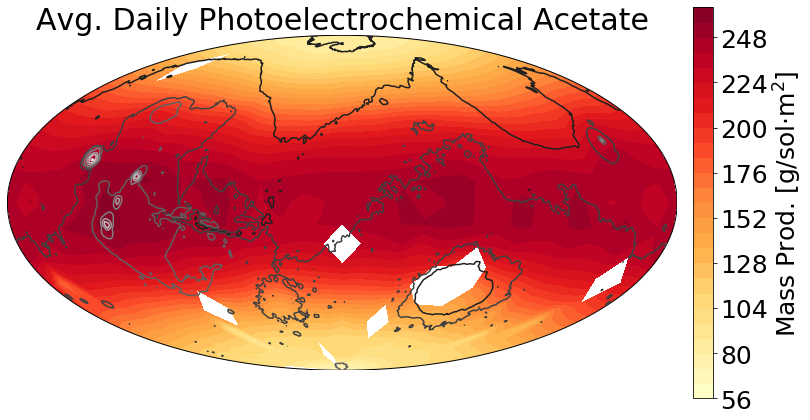

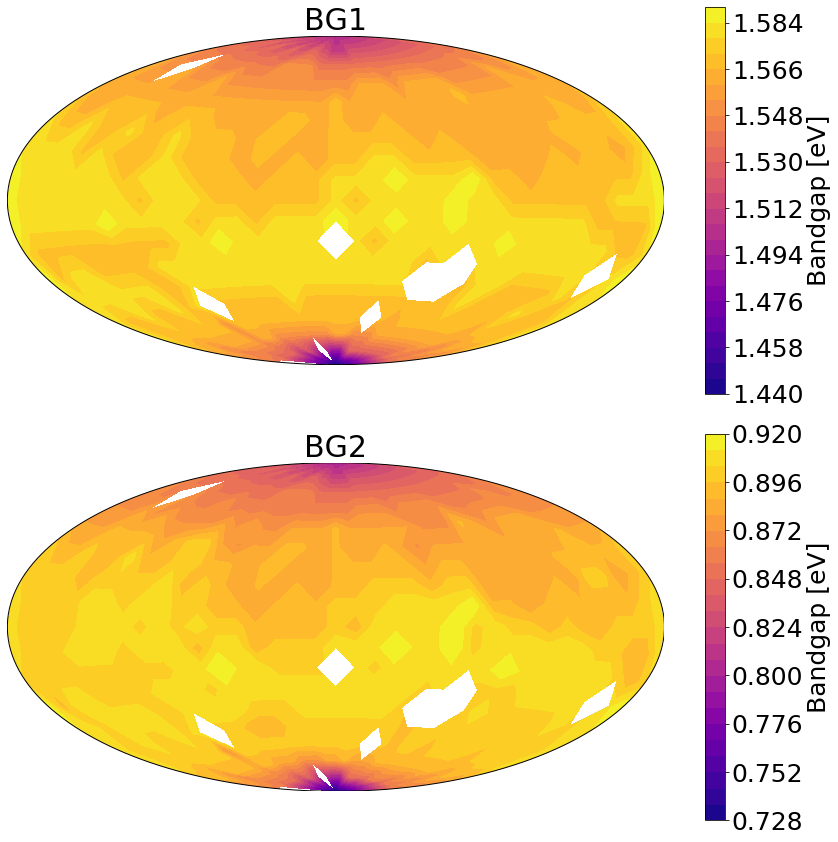

In [6]:
## 2J-aa
ds = xr.open_dataset('j2aa_final.nc')
nc = xr.open_dataset('extras/surface.nc')


## 2J-aa Plot
fig = plt.figure(figsize=(12,6)) # set plot size
lon_0 = 0
lat_0 = 0
m = Basemap(projection='hammer',lon_0=lon_0)
Lat2,Lon2 = np.meshgrid(np.array(nc.variables['latitude']),np.array(nc.variables['longitude']))
Lon2,Lat2 = m(Lon2,Lat2)
zMOL = nc.variables['zMOL']
albedo = nc.variables['albedo']
m.contour(Lon2,Lat2,np.transpose(np.array(zMOL)), cmap='gist_gray')

lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
lons,lats = m(lons,lats)
prod = ds['j2aa']
cs = m.contourf(lons,lats,prod.transpose(), cmap='YlOrRd', levels=25)
plt.title('Avg. Daily Photoelectrochemical Acetate', fontsize = 30)

cbar = plt.colorbar(cs, pad=0.02)
cbar.set_label(r'Mass Prod. [g/sol$\cdot$m$^2$]', fontsize=25)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('j2aa.png',dpi=300,bbox_inches='tight')

## 3J-PV BGs Plot
keys = ['j2aa-bg1', 'j2aa-bg2']
tit = ['BG1', 'BG2']

minbg = np.min(np.array([np.min(ds[x]) for x in keys]))
maxbg = np.max(np.array([np.max(ds[x]) for x in keys]))
norm = normalizer=Normalize(minbg,maxbg)

# fig = plt.figure(figsize=(12,6)) # set plot size
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
minbg = []
for i in range(0,len(keys)):
    ax[i].set_title(str(tit[i]), fontsize = 30)
    m = Basemap(projection='hammer',lon_0=0,ax=ax[i])
    lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
    lons,lats = m(lons,lats)
    bg = ds[keys[i]]
    cs = m.contourf(lons,lats,bg.transpose(),cmap='plasma',levels=25)
#     cbar = plt.colorbar(cs, pad=0.02, ax=ax.ravel().tolist())
    cbar = plt.colorbar(cs, ax=ax[i])
    cbar.set_label(r'Bandgap [eV]', fontsize=25)
    cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('j2aabg.png',dpi=300,bbox_inches='tight')

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

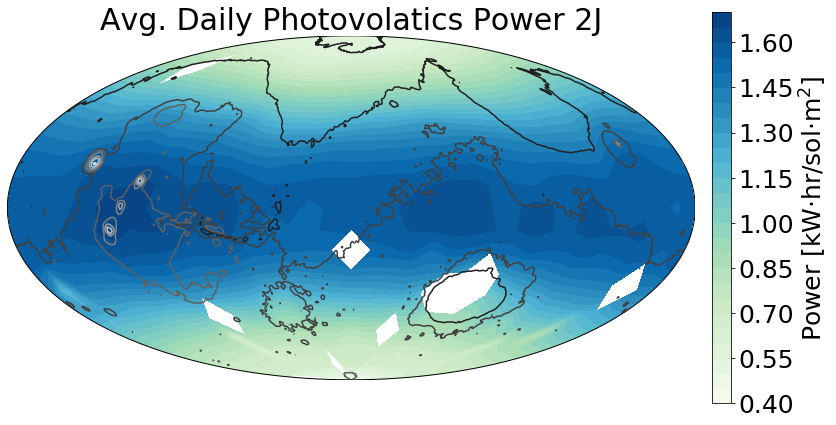

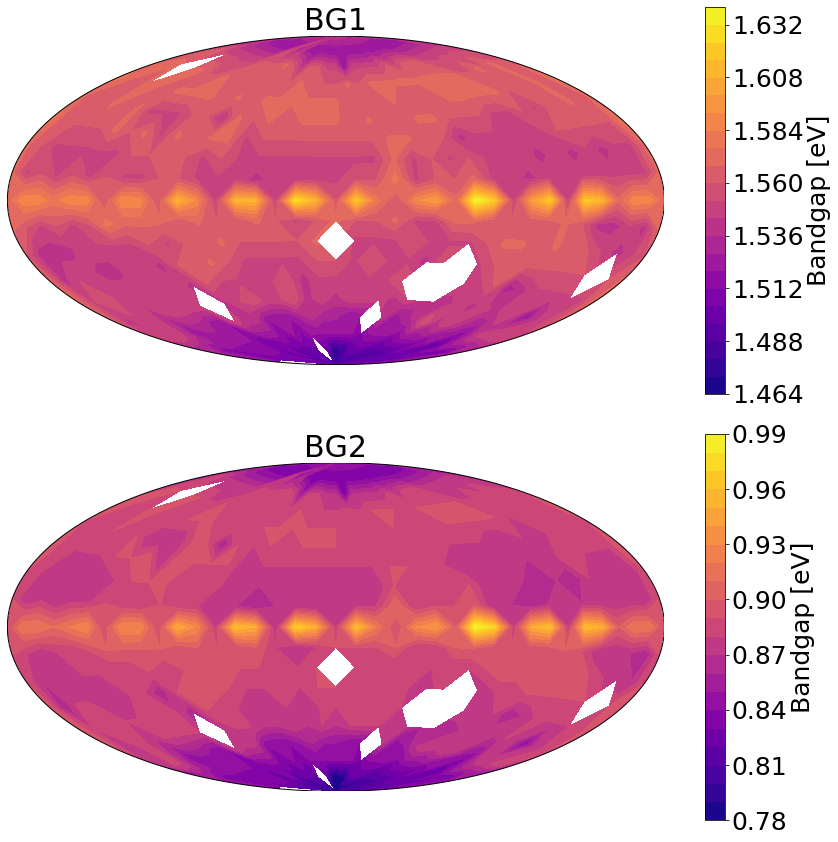

In [7]:
## 2J-PV
ds = xr.open_dataset('j2pv_final.nc')
nc = xr.open_dataset('extras/surface.nc')


## 2J-PV Plot
fig = plt.figure(figsize=(12,6)) # set plot size
lon_0 = 0
lat_0 = 0
m = Basemap(projection='hammer',lon_0=lon_0)
Lat2,Lon2 = np.meshgrid(np.array(nc.variables['latitude']),np.array(nc.variables['longitude']))
Lon2,Lat2 = m(Lon2,Lat2)
zMOL = nc.variables['zMOL']
albedo = nc.variables['albedo']
m.contour(Lon2,Lat2,np.transpose(np.array(zMOL)), cmap='gist_gray')

lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
lons,lats = m(lons,lats)
prod = ds['j2pv']
cs = m.contourf(lons,lats,prod.transpose(),  cmap='GnBu', levels=25)
plt.title(r'Avg. Daily Photovolatics Power 2J', fontsize = 30)

cbar = plt.colorbar(cs, pad=0.02)
cbar.set_label(r'Power [kW$\cdot$hr/sol$\cdot$m$^2$]', fontsize=25)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('j2pv.png',dpi=300,bbox_inches='tight')

## 3J-PV BGs Plot
keys = ['j2pv-bg1', 'j2pv-bg2']
tit = ['BG1', 'BG2']

minbg = np.min(np.array([np.min(ds[x]) for x in keys]))
maxbg = np.max(np.array([np.max(ds[x]) for x in keys]))
norm = normalizer=Normalize(minbg,maxbg)

# fig = plt.figure(figsize=(12,6)) # set plot size
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
minbg = []
for i in range(0,len(keys)):
    ax[i].set_title(str(tit[i]), fontsize = 30)
    m = Basemap(projection='hammer',lon_0=0,ax=ax[i])
    lons,lats = np.meshgrid(np.array(ds['lon']),np.array(ds['lat']))
    lons,lats = m(lons,lats)
    bg = ds[keys[i]]
    cs = m.contourf(lons,lats,bg.transpose(),cmap='plasma',levels=25)
#     cbar = plt.colorbar(cs, pad=0.02, ax=ax.ravel().tolist())
    cbar = plt.colorbar(cs, ax=ax[i])
    cbar.set_label(r'Bandgap [eV]', fontsize=25)
    cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('j2pvbg.png',dpi=300,bbox_inches='tight')

In [72]:
def CAMassCalc(PV3val,PECH2val,t_store):

    #capacity stuff
    cap = .75

    #adjust to 80% of DBL (for PV only -- PEC inefficiency already account for by 700 mV)
    eta_DBL = 0.8

    # power and material demands
    Phab = 40
    N_dot = 8.33e-3
    M_dot = 0.61
    B_dot = 0.1

    # conversion factors
    a_HB = 0.196
    a_S = 0.554
    a_BP = 0.155
    a_E = 54.13
    a_FC = 0.064
    a_HS = 3.39

    # power and energy density
    p_K = 6.25e-3
    eta_B = 80
    p_E = 1.14e-2
    e_B = 0.16
    p_FC = 0.365
    e_HS = 7.18e-2

    # solar cell array mass
    m_PV = 2.0
    m_PEC = 2.4

    # other parameters
    chi = 0.33

    # nuclear power/mass calcs
    P_K = Phab +a_E * (N_dot*a_HB + M_dot*a_S + B_dot*a_BP)
    mK = P_K/p_K + (N_dot*a_HB + M_dot*a_S + B_dot*a_BP) / p_E

    # photovoltaic + battery calc
    P_PVB = (chi + (1-chi)/eta_B) * (Phab +a_E * (N_dot*a_HB + M_dot*a_S + B_dot*a_BP))
    mPVB = P_PVB / (PV3val*cap*eta_DBL/m_PV/24.6) \
    + (Phab +a_E * (N_dot*a_HB + M_dot*a_S + B_dot*a_BP)) * t_store / e_B \
    + (N_dot*a_HB + M_dot*a_S + B_dot*a_BP) / p_E

    # photvoltaic + electrolyzer calc
    m_dot_H2_PVE = ((1-chi)*Phab*a_FC + (N_dot*a_HB + M_dot*a_S + B_dot*a_BP)) / (1-a_HS*a_FC)
    P_PVE = chi*Phab + a_E*m_dot_H2_PVE
    mPVE = P_PVE / (PV3val*cap*eta_DBL/m_PV/24.6) \
    + m_dot_H2_PVE / p_E \
    + (Phab+a_HS*m_dot_H2_PVE) / p_FC \
    + (Phab*a_FC + (N_dot*a_HB + M_dot*a_S + B_dot*a_BP)) * t_store / e_HS

    # photoelectrochemical calc
    m_dot_H2_PEC = (Phab*a_FC + (N_dot*a_HB + M_dot*a_S + B_dot*a_BP)) / (1-a_HS*a_FC)
    mPEC = m_dot_H2_PEC / (cap*PECH2val/m_PEC/24.6/1000) \
    + (Phab+a_HS*m_dot_H2_PEC) / p_FC \
    + (Phab*a_FC + (N_dot*a_HB + M_dot*a_S + B_dot*a_BP)) * t_store / e_HS

    return [mK,mPVB,mPVE,mPEC];

In [85]:
dsj2h2 = xr.open_dataset('j2h2_final.nc')
dsj3pv = xr.open_dataset('j3pv_final.nc')
dsj2pv = xr.open_dataset('j2pv_final.nc')
j2h2val = dsj2h2['j2h2']
j3pvval = dsj3pv['j3pv']

In [86]:
t_store = 1.0
mK,mPVB,mPVE,mPEC = CAMassCalc(j3pvval.transpose(),j2h2val.transpose(),t_store*24.6)

/Users/aaronberliner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: No contour levels were found within the data range.
  app.launch_new_instance()


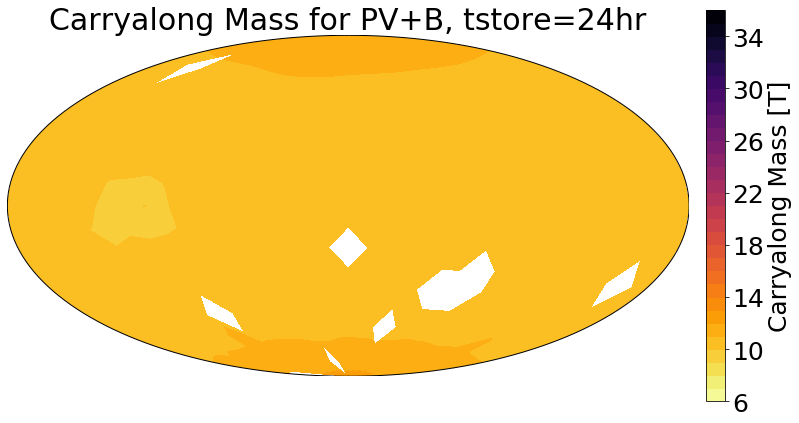

In [89]:
clevels = np.arange(6,37,1)
clevels_label = np.arange(6,37,25)


# PVB

fig = plt.figure(figsize=(12,6)) # set plot size
lon_0 = 0
lat_0 = 0
m = Basemap(projection='hammer',lon_0=lon_0)
lons,lats = np.meshgrid(np.array(dsj3pv['lon']),np.array(dsj3pv['lat']))
lons,lats = m(lons,lats)
cs = m.contourf(lons,lats,mPVB/1000,  cmap='inferno_r', levels=clevels)
plt.title(r'Carryalong Mass for PV+B, tstore=24hr', fontsize = 30)
cbar = plt.colorbar(cs, pad=0.02)
cs = m.contour(lons,lats,mPVB/1000, levels=[mK/1000],colors='#000000',zorder=3,linewidths=1,linestyles='--')
cbar.set_label(r'Carryalong Mass [T]', fontsize=25)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('pvb.png',dpi=300,bbox_inches='tight')


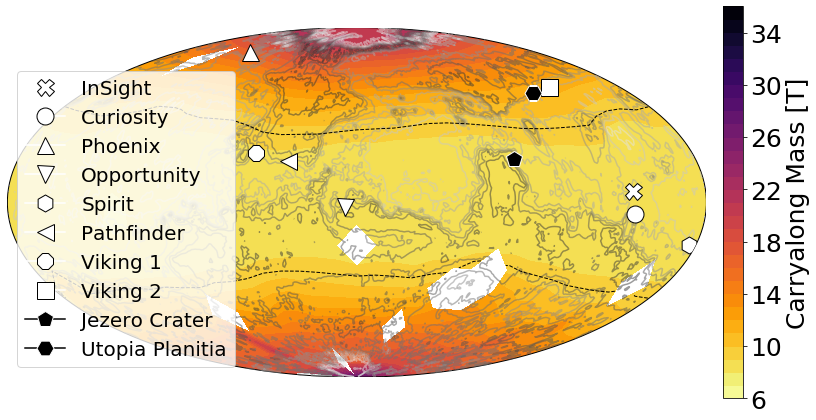

In [98]:
# PVE
fig = plt.figure(figsize=(12,6)) # set plot size
lon_0 = 0
lat_0 = 0
m = Basemap(projection='hammer',lon_0=lon_0)
lons,lats = np.meshgrid(np.array(dsj3pv['lon']),np.array(dsj3pv['lat']))
lons,lats = m(lons,lats)
cs = m.contourf(lons,lats,mPVE/1000,  cmap='inferno_r', levels=clevels)
# plt.title(r'Carryalong Mass for PV+E, 24hr', fontsize = 30)
cbar = plt.colorbar(cs, pad=0.02)
cs = m.contour(lons,lats,mPVE/1000, levels=[mK/1000],colors='#000000',zorder=3,linewidths=1,linestyles='--')
cbar.set_label(r'Carryalong Mass [T]', fontsize=25)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)

marker = ['X', 'o', '^', 'v', 'h', '<', '8', 's', 'p', 'H', '>']
directory = 'extras/'
loc_file = 'SpecialLocations.xlsx' # assign the filename
dfloc = pd.read_excel(directory+loc_file) # read in the file as a pandas dataframe

# parallels = np.arange(0.,81,10.)
# # labels = [left,right,top,bottom]
# m.drawparallels(parallels,labels=[False,True,True,False])
# meridians = np.arange(10.,351.,20.)
# m.drawmeridians(meridians,labels=[True,False,False,True])

for i in range(0,len(dfloc['Location'])):
    if dfloc['Status'][i] == 'proposed':
        c = 'k'
        d = 'w'
    else:
        c = 'w'
        d = 'k'

    x,y = m(dfloc['Longitude'][i], dfloc['Latitude'][i])
    m.plot(x,y, markersize=17, marker=marker[i],
           markeredgecolor=d, color=c,label=dfloc['Location'][i])

plt.legend(loc=3, fontsize=20)
plt.contour(Lon2,Lat2,np.transpose(np.array(albedo)), cmap='gist_gray', alpha=.5)


fig.tight_layout()
fig.savefig('pve.png',dpi=300,bbox_inches='tight')


In [77]:
# marker = ['X', 'o', '^', 'v', 'h', '<', '8', 's', 'p', 'H', '>']
# loc_file = 'SpecialLocations.xlsx' # assign the filename
# dfloc = pd.read_excel(directory+loc_file) # read in the file as a pandas dataframe
#
# for i in range(0,len(df['Location'])):
#     if dfloc['Status'][i] == 'proposed':
#         c = 'k'
#         d = 'w'
#     else:
#         c = 'w'
#         d = 'k'
#
#     x,y = m(dfloc['Longitude'][i], dfloc['Latitude'][i])
#     m.plot(x,y, markersize=17, marker=marker[i],
#            markeredgecolor=d, color=c,label=dfloc['Location'][i])
#
# plt.legend(loc=3, fontsize=12)
# plt.contour(Lon2,Lat2,np.transpose(np.array(albedo)), cmap='gist_gray', alpha=.5)
#



In [78]:
# Calc for Equator
x = np.array(mPVE[9:11,:])
x=x[~np.isnan(x)]
np.average(x/1000)

8.317860843126091

In [79]:
# Calc for South Pole
x = np.array(mPVE[0:2,:])
x=x[~np.isnan(x)]
np.average(x/1000)

22.35352607964326

In [80]:
# Calc for North Pole
x = np.array(mPVE[18:19,:])
x=x[~np.isnan(x)]
np.average(x/1000)

20.535818922228362

/Users/aaronberliner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()


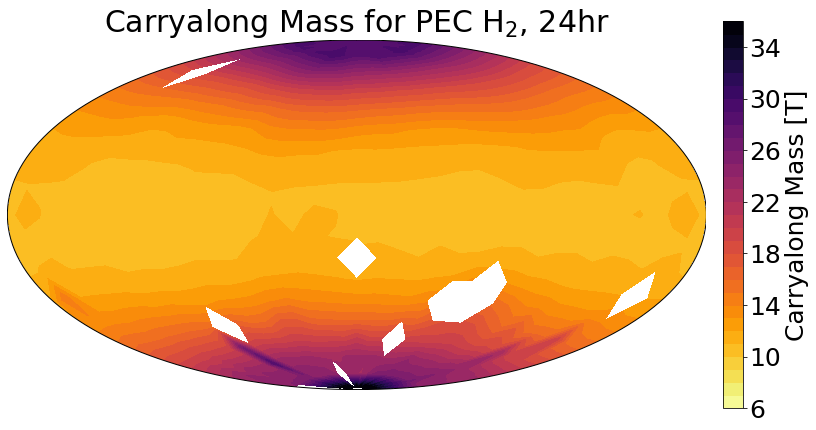

In [81]:

# PEC
fig = plt.figure(figsize=(12,6)) # set plot size
lon_0 = 0
lat_0 = 0
m = Basemap(projection='hammer',lon_0=lon_0)
lons,lats = np.meshgrid(np.array(dsj3pv['lon']),np.array(dsj3pv['lat']))
lons,lats = m(lons,lats)
cs = m.contourf(lons,lats,mPEC/1000,  cmap='inferno_r', levels=clevels)
plt.title(r'Carryalong Mass for PEC H$_{2}$, 24hr', fontsize = 30)
cbar = plt.colorbar(cs, pad=0.02)
cs = m.contour(lons,lats,mPEC/1000, levels=[mK/1000],colors='#000000',zorder=3,linewidths=1,linestyles='--')
cbar.set_label(r'Carryalong Mass [T]', fontsize=25)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=25)
fig.tight_layout()
fig.savefig('pec.png',dpi=300,bbox_inches='tight')

In [94]:
## Interpolations for anthony
tpec = np.zeros(len(dfloc['Location']))
tpve = np.zeros(len(dfloc['Location']))
tpvb = np.zeros(len(dfloc['Location']))
lon = np.array(dsj3pv['lon'])
lat = np.array(dsj3pv['lat'])
fPEC = interpolate.interp2d(lon,lat,mPEC/1000, kind='linear')
fPVE = interpolate.interp2d(lon,lat,mPVE/1000, kind='linear')
fPVB = interpolate.interp2d(lon,lat,mPVB/1000, kind='linear')
locs = list(np.zeros(len(dfloc['Location'])))

for i in range(0,len(dfloc['Location'])):
    loc = dfloc['Location'][i]
    lat = dfloc['Latitude'][i]
    lon = dfloc['Longitude'][i]
    locs[i] = loc
    tpec[i] = fPEC(lon,lat)
    tpve[i] = fPVE(lon,lat)
    tpvb[i] = fPVB(lon,lat)
data = np.array([tpec,tpve,tpvb]).transpose()
res = pd.DataFrame(data, columns=['PEC', 'PVE','PVB'], index=locs)
res.to_clipboard()
res
# vlat


,PEC,PVE,PVB
InSight,10.929830,8.440916,10.043352
Curiosity,10.868238,8.383766,10.036026
Phoenix,22.665972,16.517884,11.078776
Opportunity,10.910182,8.416878,10.040270
Spirit,10.921480,8.406683,10.038963
Pathfinder,11.290565,8.690599,10.075360
Viking 1,11.526940,8.839836,10.094491
Viking 2,15.310634,11.431762,10.426762
Jezero Crater,11.186521,8.607252,10.064675
Utopia Planitia,15.198448,11.393182,10.421817


In [95]:
th2 = np.zeros(len(dfloc['Location']))
tpv = np.zeros(len(dfloc['Location']))
dsj2h2 = xr.open_dataset('j2h2_final.nc')
dsh3pv = xr.open_dataset('j3pv_final.nc')
h2 = dsj2h2['j2h2']
pv = dsh3pv['j3pv']
lon = np.array(dsj3pv['lon'])
lat = np.array(dsj3pv['lat'])
fh2 = interpolate.interp2d(lon,lat,h2.transpose(), kind='linear')
fpv = interpolate.interp2d(lon,lat,pv.transpose(), kind='linear')

for i in range(0,len(dfloc['Location'])):
    loc = dfloc['Location'][i]
    lat = dfloc['Latitude'][i]
    lon = dfloc['Longitude'][i]
    locs[i] = loc
    tpec[i] = fPEC(lon,lat)
    tpve[i] = fPVE(lon,lat)
    tpvb[i] = fPVB(lon,lat)
    th2[i] = fh2(lon,lat)
    tpv[i] = fpv(lon,lat)
data = np.array([tpec,tpve,tpvb,th2,tpv]).transpose()
res = pd.DataFrame(data, columns=['PEC', 'PVE','PVB','2jh2', '3jpv'], index=locs)
res.to_clipboard()


In [68]:
lons

array([[18019900.7264766 , 18019900.7264766 , 18019900.7264766 ,
        18019900.7264766 , 18019900.7264766 , 18019900.7264766 ,
        18019900.7264766 , 18019900.7264766 , 18019900.7264766 ,
        18019900.7264766 , 18019900.7264766 , 18019900.7264766 ,
        18019900.7264766 , 18019900.7264766 , 18019900.7264766 ,
        18019900.7264766 , 18019900.7264766 , 18019900.7264766 ,
        18019900.7264766 , 18019900.7264766 , 18019900.7264766 ,
        18019900.7264766 , 18019900.7264766 , 18019900.7264766 ,
        18019900.7264766 , 18019900.7264766 , 18019900.7264766 ,
        18019900.7264766 , 18019900.7264766 , 18019900.7264766 ,
        18019900.7264766 , 18019900.7264766 , 18019900.7264766 ,
        18019900.7264766 , 18019900.7264766 , 18019900.7264766 ,
        18019900.7264766 ],
       [14890777.80358494, 14926009.29342864, 14983751.78942785,
        15063113.95165775, 15163097.91101747, 15282614.6265679 ,
        15420497.65413249, 15575515.34032626, 15746381.5058110

In [ ]:
dsh = xr.open_dataset('j2h2_final.nc')
dsp = xr.open_dataset('j3pv_final.nc')
dsp2 = xr.open_dataset('j2pv_final.nc')
plt.hist(np.reshape(np.array(dsp['j3pv-bg1']), -1), color='#c1b3e9', label='3pv-bg1', alpha=0.6)
plt.hist(np.reshape(np.array(dsp['j3pv-bg2']), -1), color='#a38edd', label='3pv-bg1', alpha=0.6)
plt.hist(np.reshape(np.array(dsp['j3pv-bg3']), -1), color='#472e8b', label='3pv-bg3', alpha=0.6)
plt.hist(np.reshape(np.array(dsh['j2h2-bg1']), -1), color='#f78080', label='2h2-bg1', alpha=0.6)
plt.hist(np.reshape(np.array(dsh['j2h2-bg2']), -1), color='#911a1a', label='2h2-bg2', alpha=0.6)
plt.hist(np.reshape(np.array(dsp2['j2pv-bg1']), -1), color='#abfab4', label='2pv-bg1', alpha=0.6)
plt.hist(np.reshape(np.array(dsp2['j2pv-bg2']), -1), color='#167922', label='2pv-bg2', alpha=0.6)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.xlabel('Bandgap [ev]',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tight_layout()
plt.savefig('bgcount.png',dpi=300,bbox_inches='tight')

4####

In [ ]:
maxpv = np.max(dsp['j3pv'])
maxargs = np.unravel_index(np.argmax(dsp['j3pv']),np.shape(dsp['j3pv']), order='C')
maxlon = maxargs[0]
maxlat = maxargs[1]
a = np.reshape(np.array(dsp2['j2pv-bg1']), -1)
a = a[~np.isnan(a)]
b = np.reshape(np.array(dsp2['j2pv-bg2']), -1)
b = b[~np.isnan(b)]
df1 = pd.DataFrame(np.array([a,b]).transpose(), columns=['bg1','bg2'])
df1['sys'] = 'j2pv'
a = np.reshape(np.array(dsh['j2h2-bg1']), -1)
a = a[~np.isnan(a)]
b = np.reshape(np.array(dsh['j2h2-bg2']), -1)
b = b[~np.isnan(b)]
df2 = pd.DataFrame(np.array([a,b]).transpose(), columns=['bg1','bg2'])
df2['sys'] = 'j2h2'
# a = np.reshape(np.array(dsp['j3pv-bg1']), -1)
# a = a[~np.isnan(a)]
# b = np.reshape(np.array(dsp['j3pv-bg2']), -1)
# b = b[~np.isnan(b)]
# df3 = pd.DataFrame(np.array([a,b]).transpose(), columns=['bg1','bg2'])
# df3['sys'] = 'j3pv'

df = pd.concat([df1, df2],ignore_index=True)
# df = pd.concat([df1, df2, df3],ignore_index=True)
# fig = plt.figure()
# ax = fig.add_subplot(111)
p = sns.jointplot(data=df, x="bg1", y="bg2", kind="kde",hue='sys',fill=True,alpha=.6, ax=ax)
p.set_axis_labels('BandGap 1 [eV]', 'BandGap 2 [eV]', fontsize=15)
# plt.setp(p.get_legend().get_texts(), fontsize='22'
p.savefig('test.png',dpi=300)
# plt.set_xlabel('bg1',fontsize=15)

In [96]:
fh2(-175.7,47.2)

array([nan])